In [1]:
# import required packages
import tensorflow as tf

# dataset
from sklearn.datasets import load_breast_cancer

# utility
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## EDA and Preprocessing:

In [2]:
# load data
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.target.shape

(569,)

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# split data: train-test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [10]:
N, D = X_train.shape
N, D

(381, 30)

In [11]:
# normalize the data set
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Simple Logistic Regression Model:

In [12]:
# define logistic regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# alternative way
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='signmoid))

In [13]:
# compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',   
    metrics=['accuracy'] 
)

In [14]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100


12/12 [==============================] - 1s 28ms/step - loss: 0.9849 - accuracy: 0.5039 - val_loss: 0.8652 - val_accuracy: 0.5160
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.9137 - accuracy: 0.5486 - val_loss: 0.7974 - val_accuracy: 0.5585
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8512 - accuracy: 0.5748 - val_loss: 0.7356 - val_accuracy: 0.6277
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7911 - accuracy: 0.6063 - val_loss: 0.6826 - val_accuracy: 0.6543
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7383 - accuracy: 0.6378 - val_loss: 0.6353 - val_accuracy: 0.6862
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.6772 - val_loss: 0.5942 - val_accuracy: 0.7447
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6485 - accuracy: 0.7060 - val_loss: 0.5581 - val_accuracy: 0.7713
Epoch 8/

In [15]:
# final train score
model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9685


[0.12181942164897919, 0.9685039520263672]

In [16]:
# final test score
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9787


[0.09232471138238907, 0.978723406791687]

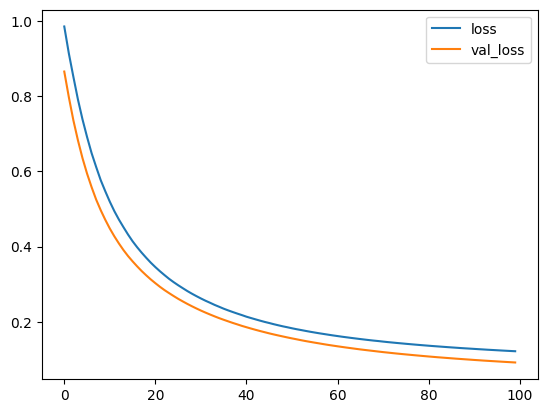

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend();

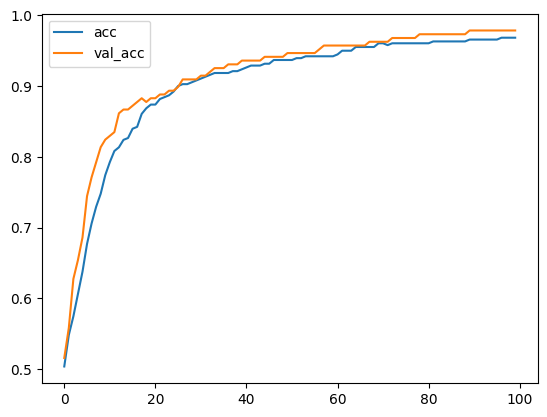

In [18]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.legend();

## Making Predictions:

In [19]:
# make predictions
p = model.predict(X_test)
p

6/6 [==============================] - 0s 3ms/step


array([[1.70896557e-04],
       [4.92490968e-03],
       [1.37061894e-01],
       [1.53273538e-01],
       [3.16173100e-06],
       [9.74110246e-01],
       [9.78379965e-01],
       [1.21351041e-01],
       [1.29430415e-02],
       [9.84212399e-01],
       [4.53471541e-01],
       [9.96597767e-01],
       [9.98089254e-01],
       [9.55112100e-01],
       [9.39218938e-01],
       [8.67445886e-01],
       [9.82069910e-01],
       [8.13430607e-01],
       [2.34864210e-03],
       [3.63718369e-04],
       [4.37480509e-01],
       [8.82199943e-01],
       [1.58966624e-03],
       [9.95120764e-01],
       [1.72842678e-03],
       [3.00322404e-06],
       [7.75832713e-01],
       [9.47480500e-01],
       [8.66638184e-01],
       [9.92129624e-01],
       [9.04249682e-05],
       [9.83372033e-01],
       [1.30066918e-02],
       [9.89371002e-01],
       [1.86654238e-03],
       [9.66833770e-01],
       [1.64266734e-04],
       [2.40243335e-05],
       [8.76030326e-01],
       [9.80726182e-01],


In [20]:
# round to get the actual predictions
# Note: has to be flattened since the targets are size(N,) while the predictions are size (N,1)
p = np.round(p).flatten()
p

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.], dtype=float32)

In [21]:
# calculate the accuracy, compare it to evaluate() output
print(f'Manually calculated accuracy: {np.mean(p == y_test)}')
print(f'Evaluate() output: {model.evaluate(X_test, y_test)}')

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9787
Evaluate() output: [0.09232471138238907, 0.978723406791687]


## Saving and Loading the Model:

In [22]:
# save the model to a file
model.save('model_classification.keras')

In [23]:
# load the model and confirm that it still works
model = tf.keras.models.load_model('model_classification.keras')
print(model.layers)

In [24]:
# verify the performance of the model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9787


[0.09232471138238907, 0.978723406791687]